In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
kb = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

from misloc_mispol_package.parameterize import displaced_osc_model as dom


In [2]:
## This needs to be in a seperate cell from the imports
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 300,  # to adjust notebook inline plot size
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4, 3], # 4 x 3
    'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)


In [3]:
test_script_d = 1.5

In [4]:
dom.invcmtohz(2500)*hbar

0.30996049346900717

In [5]:
dom.invcmtohz(600)*hbar

0.07439051843256171

In [6]:
def sig_prime(omega, t): 
    return np.real(np.exp(1j*(omega)*t*1e-15 - dom.g(t, test_script_d)))

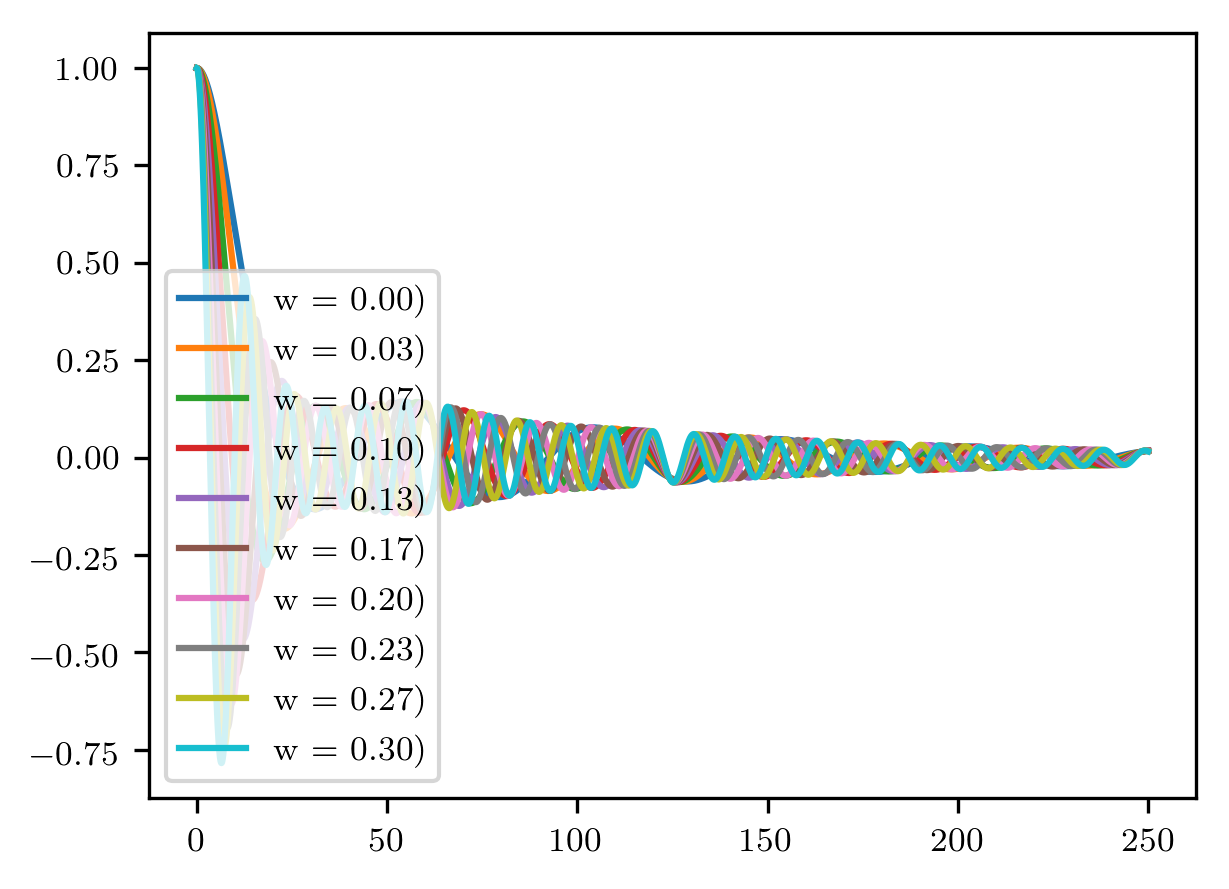

In [7]:
omegas = np.linspace(0, .3/hbar, 10)
time_points = 10000
t_bound = 250
for w in omegas:
    plt.plot(
        np.linspace(0, t_bound, time_points), 
        sig_prime(w, np.linspace(0, t_bound, time_points)),
        label=f'w = {(hbar*w):.2f})'
        )
#     plt.xlim([0,.1])
        
plt.legend()

In [9]:
omegas[:]

array([0.00000000e+00, 5.06422487e+13, 1.01284497e+14, 1.51926746e+14,
       2.02568995e+14, 2.53211243e+14, 3.03853492e+14, 3.54495741e+14,
       4.05137990e+14, 4.55780238e+14])

```
model = mol_fluo_model(
    num_vib_modes=2,
    script_d=[1, 2]
    hbar_omega_0=[1, 2]
    hbar_gamma=[1, 2]
    )

model.emisson(mode=1)

```